# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# open URL to get html need before creating BS object
html = browser.html

# Create a Beautiful Soup object

soup = bs(html, 'html.parser')

In [5]:
# Find the table to then get the rows
table = soup.find("table", class_="table")

# Extract all rows of data
rows = table.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temp = []

# Extract the header
row_header = table.find_all("th")

row_header


[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [7]:
# Find all the rows in the table to seperate headers for building df
rows = table.find_all("tr")

# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the cells from the row
    cells = row.find_all("td")

    # Print for verification
    for cell in cells:
        print(cell.text.strip())


2
2012-08-16
10
155
6
-75.0
739.0
13
2012-08-17
11
156
6
-76.0
740.0
24
2012-08-18
12
156
6
-76.0
741.0
35
2012-08-19
13
157
6
-74.0
732.0
46
2012-08-20
14
157
6
-74.0
740.0
57
2012-08-21
15
158
6
-78.0
740.0
68
2012-08-22
16
158
6
-77.0
740.0
79
2012-08-23
17
159
6
-76.0
742.0
112
2012-08-27
21
161
6
-74.0
741.0
114
2012-08-28
22
162
6
-74.0
742.0
123
2012-08-29
23
162
6
-75.0
741.0
134
2012-08-30
24
163
6
-75.0
742.0
145
2012-08-31
25
163
6
-75.0
743.0
156
2012-09-01
26
164
6
-76.0
745.0
163
2012-09-02
27
164
6
-75.0
743.0
170
2012-09-03
28
165
6
-75.0
745.0
171
2012-09-04
29
166
6
-75.0
747.0
172
2012-09-05
30
166
6
-74.0
747.0
173
2012-09-06
31
167
6
-74.0
745.0
175
2012-09-08
33
168
6
-73.0
748.0
176
2012-09-10
34
168
6
-73.0
748.0
177
2012-09-11
35
169
6
-73.0
749.0
178
2012-09-12
36
169
6
-73.0
750.0
179
2012-09-13
37
170
6
-73.0
750.0
180
2012-09-14
38
171
6
-73.0
750.0
181
2012-09-15
39
171
6
-75.0
751.0
182
2012-09-16
40
172
6
-75.0
753.0
183
2012-09-17
41
172
6
-75.0
753.0
1

In [8]:
# Create an empty list now for the rows and headers.
mars_temp = []

# Extract the headers
row_headers = [header.text.strip() for header in row_header]

# Find all the rows in the table
rows = table.find_all("tr")

# Loop through the rows
for row in rows:
    # Extract the cells from the row
    cells = row.find_all("td")

    # Create a list to store the row values
    row_values = []

    # Loop through the cells and extract the text content
    for cell in cells:
        row_values.append(cell.text.strip())

    # Create a dictionary mapping headers to row values
    row_dict = dict(zip(row_headers, row_values))

    # Append the row dictionary to mars_temp
    mars_temp.append(row_dict)

# Print the extracted rows for debugging
#print(mars_temp)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_temp)

In [10]:
# Confirm DataFrame was created successfully

df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [11]:
 # Remove the first row from the DataFrame to remove NaN value found 
df = df.iloc[1:]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
data_types = df.dtypes

# Print for verificagtion
print(data_types)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)



In [14]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()

# Print for verification
print(month_counts)


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [16]:
# 2. How many Martian days' worth of data are there?
martian_days = df['terrestrial_date']

# Calculate the number of unique Martian days
num_martian_days = martian_days.nunique()

# Print for verification
print(num_martian_days)


1867


In [17]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby('month')['min_temp'].mean()

# Print for verification
print(avg_low_temp)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


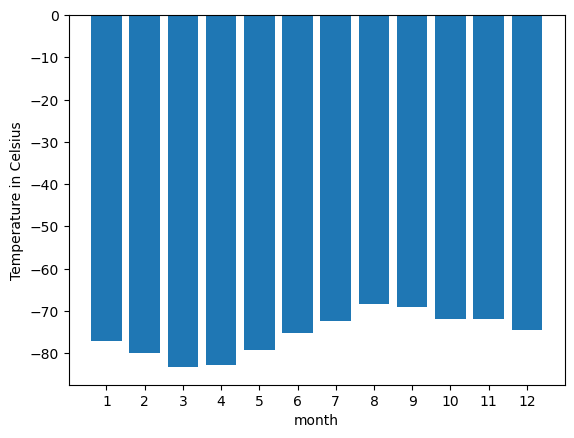

In [18]:
# Plot the average temperature by month

avg_temp = df.groupby('month')['min_temp'].mean()

# Plot the average temperature
plt.bar(avg_temp.index, avg_temp.values)
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')

plt.xticks(range(1, 13))
plt.yticks(range(-80, 1, 10))

plt.show()


<Axes: xlabel='month', ylabel='Temperature in Celsius'>

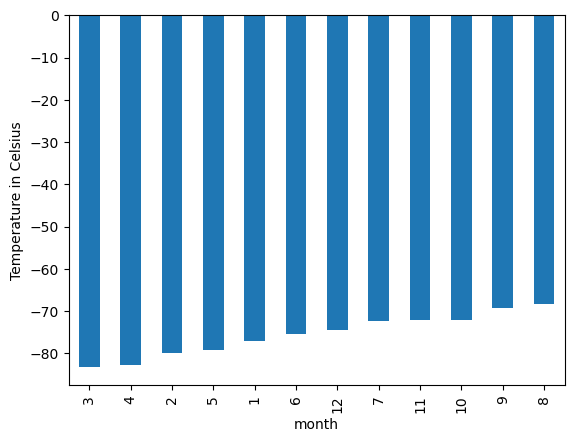

In [19]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate the average temperature by month
avg_temp = df.groupby('month')['min_temp'].mean()

# Sort the average temperature in descending order
sorted_avg_temp = avg_temp.sort_values(ascending=True)



plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
#index_strings = [str(i) for i in sorted_avg_temp.index]


# Customize the x-axis and y-axis ticks
plt.xticks(range(1, 13))
plt.yticks(range(-80, 1, 10))

# Plot the average temperature in descending order
sorted_avg_temp.plot(kind='bar')

#plt.show()
#sorted_avg_temp
#print(sorted_avg_temp.index)

In [21]:
# 4. Average pressure by Martian month

avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

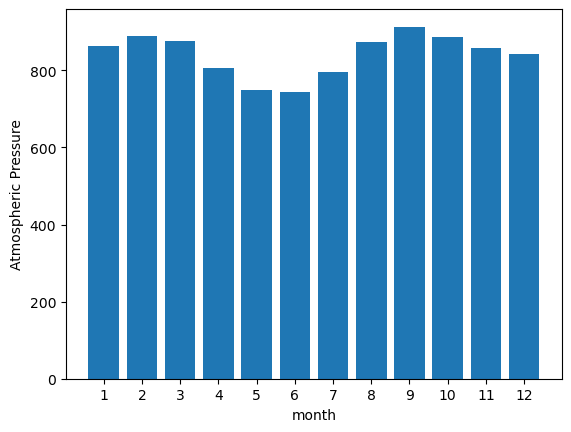

In [22]:
# Plot the average pressure by month


plt.bar(avg_pressure.index, avg_pressure.values)
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')

# Customize the x-axis and y-axis ticks
plt.xticks(range(1, 13))
plt.yticks(range(0, 801, 200))

plt.show()

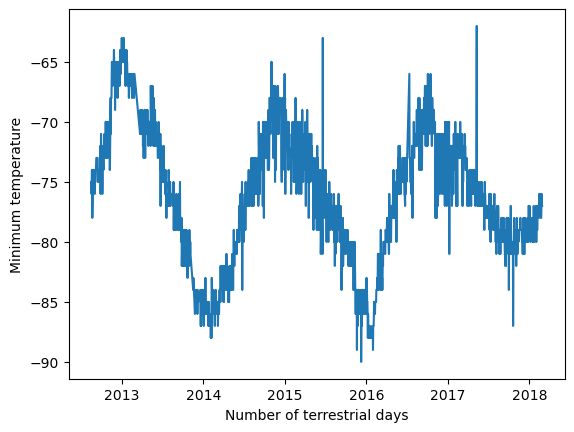

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Plot the daily minimum temperature
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')


plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [25]:
browser.quit()